In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
train = pd.read_csv("titanic_train.csv")

In [71]:
#Exploratory data analysis
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

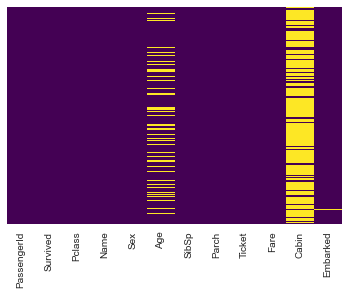

In [72]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap ="viridis")

In [73]:
sns.set_style("whitegrid")

<AxesSubplot:xlabel='Survived', ylabel='count'>

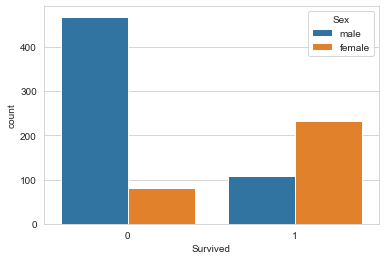

In [74]:
sns.countplot(x="Survived", hue="Sex", data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

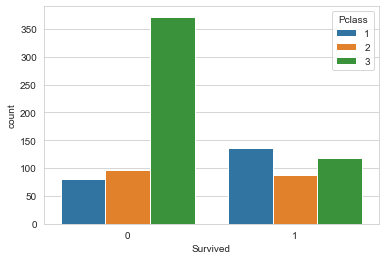

In [75]:
sns.countplot(x="Survived", hue="Pclass", data=train)

/Users/ijeonghyeon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age'>

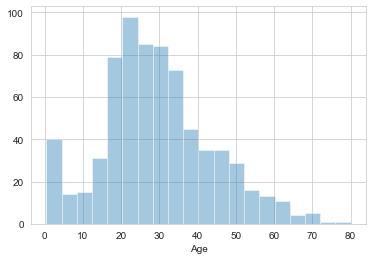

In [76]:
sns.distplot(train["Age"].dropna(), kde=False, bins=20)

<AxesSubplot:ylabel='Frequency'>

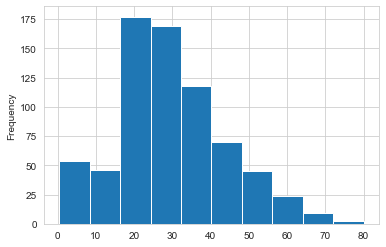

In [77]:
train["Age"].plot.hist()

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

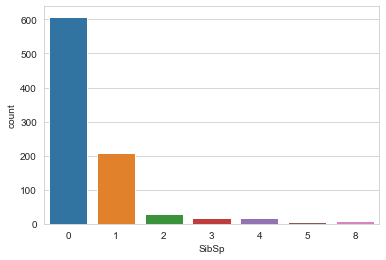

In [79]:
sns.countplot(x="SibSp", data=train)

<AxesSubplot:ylabel='Frequency'>

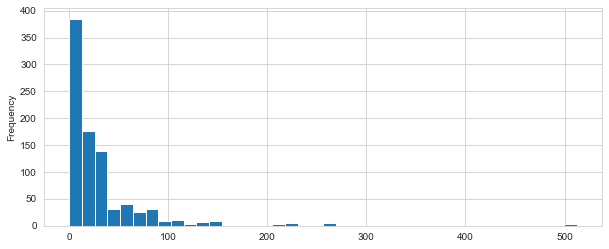

In [80]:
train["Fare"].plot.hist(bins=40, figsize=(10,4))

In [81]:
# dealing with missing value
import cufflinks as cf

In [82]:
cf.go_offline()

In [83]:
train["Fare"].iplot(kind="hist", bins=50)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

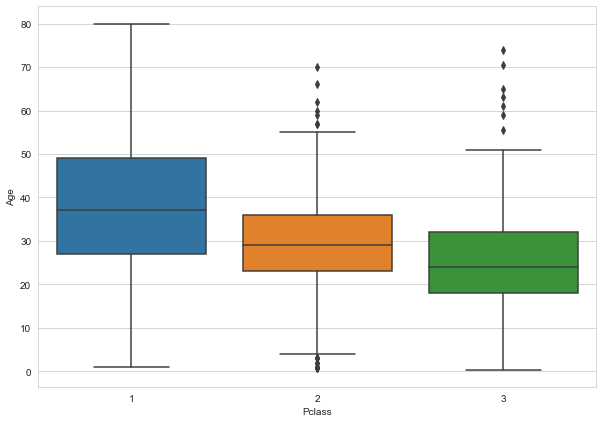

In [84]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass",y="Age",data=train)

In [85]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [86]:
train["Age"] = train[["Age","Pclass"]].apply(impute_age, axis=1)

<AxesSubplot:>

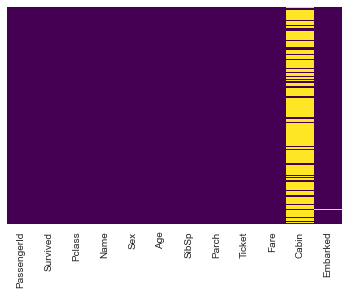

In [87]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap = "viridis")

In [88]:
train.drop("Cabin", axis=1, inplace=True)

In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [90]:
train.dropna(inplace=True)

In [91]:
sex = pd.get_dummies(train["Sex"],drop_first=True)

In [92]:
embark = pd.get_dummies(train["Embarked"], drop_first=True)

In [93]:
train = pd.concat([train,sex,embark], axis=1)

In [94]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [95]:
train.drop(["Sex","Name","Embarked","Ticket","PassengerId"],axis=1, inplace=True)

In [96]:
train.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.25,1,0,1


In [99]:
# train-test creating model

In [123]:
X= train.drop("Survived", axis=1)
y= train["Survived"]

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [135]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(max_iter=3000)

In [136]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [137]:
predictions = logmodel.predict(X_test)

In [138]:
# evaluate model

In [139]:
from sklearn.metrics import classification_report

In [140]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [141]:
from sklearn.metrics import confusion_matrix

In [142]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 32,  72]])